In [3]:
from zs6d import ZS6D
import os
import json


# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_lmo_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])

Using cache found in /home/philipp/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 13/13 [00:36<00:00,  2.83s/it]


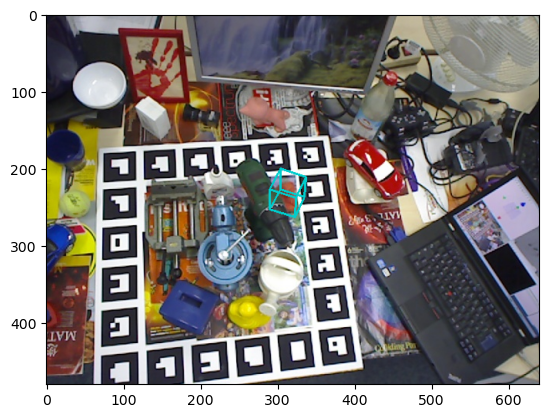

Pose estimation time: 0.2664210796356201
R_est: [[ 0.93644718  0.34912872  0.03429027]
 [ 0.2979347  -0.73989283 -0.60315298]
 [-0.1852069   0.57503717 -0.79688811]]
t_est: [ -24.77813571  -20.3746543  1235.27510013]


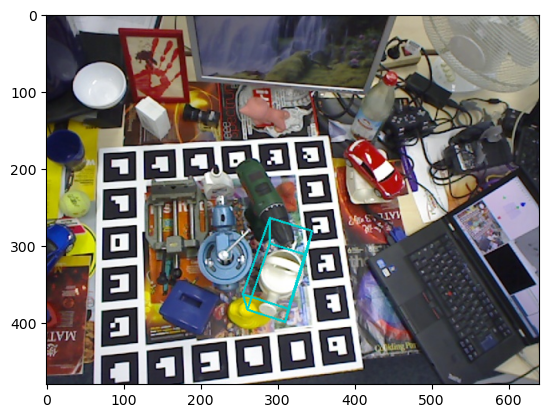

Pose estimation time: 0.515923261642456
R_est: [[ 0.9550367   0.29171628  0.05297656]
 [ 0.28858106 -0.87361991 -0.39180253]
 [-0.0680138   0.38947383 -0.91852287]]
t_est: [ -44.65612382  171.45005497 1057.74535617]


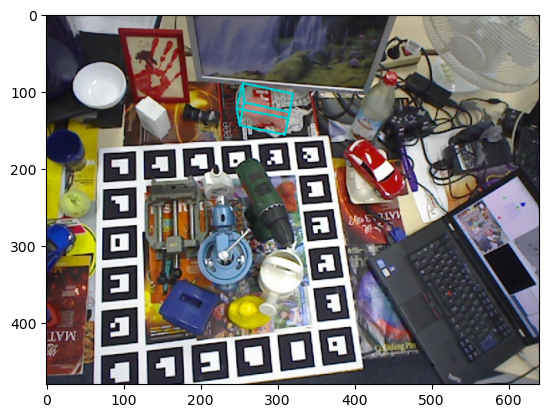

Pose estimation time: 0.343656063079834
R_est: [[ 0.18655804 -0.97941976  0.07702614]
 [-0.96170125 -0.19808282 -0.18945685]
 [ 0.20081534 -0.03873144 -0.97886315]]
t_est: [ -82.18180428 -235.24837801 1150.83138051]


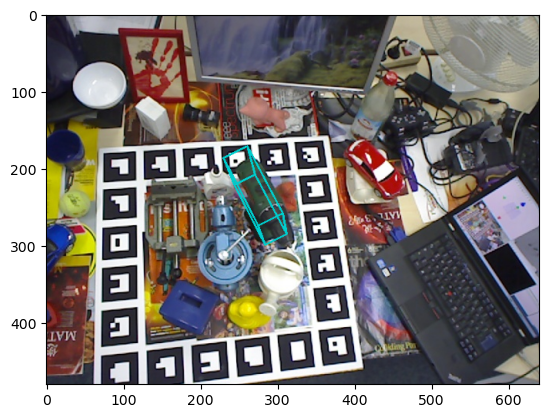

Pose estimation time: 0.4503326416015625
R_est: [[ 0.46203226  0.88661784 -0.02085647]
 [ 0.83055841 -0.44082523 -0.34036135]
 [-0.31096451  0.1399354  -0.94006338]]
t_est: [-120.60540686   -8.75833484 1330.68519012]


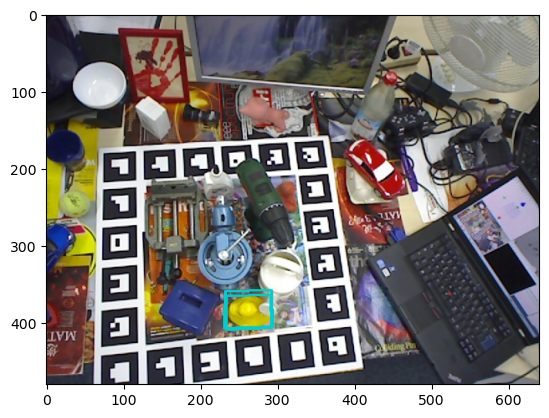

Pose estimation time: 0.30876874923706055
R_est: [[-0.99452402  0.03951135  0.09675139]
 [ 0.00638191  0.94701039 -0.32113952]
 [-0.10431322 -0.31876351 -0.94207674]]
t_est: [-108.60339886  249.74402935 1004.66407399]


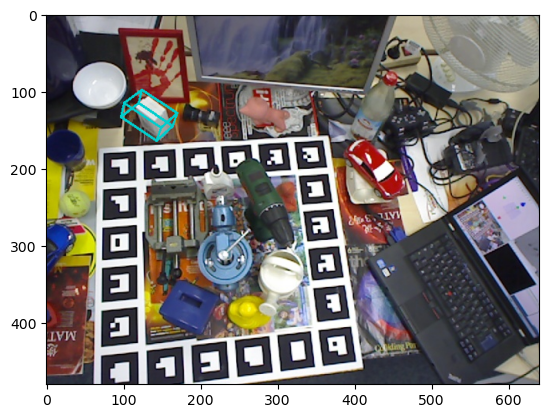

Pose estimation time: 0.3260951042175293
R_est: [[-0.83272656 -0.3424207   0.4351029 ]
 [-0.5488966   0.61365823 -0.56757034]
 [-0.07265665 -0.71145741 -0.69896307]]
t_est: [-533.20194427 -309.7775397  1598.34139479]


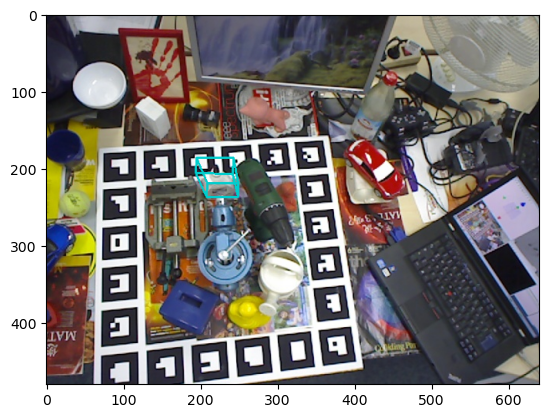

Pose estimation time: 0.273113489151001
R_est: [[ 0.01256909  0.99778793  0.06527835]
 [ 0.96055967  0.00608796 -0.2780073 ]
 [-0.27778974  0.06619804 -0.95835833]]
t_est: [-180.85850105  -50.74158057 1028.37730825]


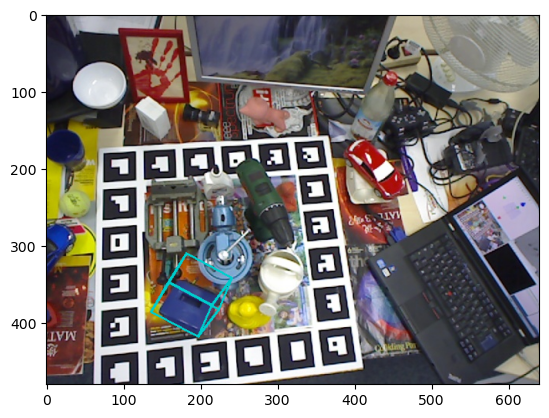

Pose estimation time: 0.46968555450439453
R_est: [[-0.51153177  0.84523157 -0.15465716]
 [ 0.68584241  0.51005301  0.51910126]
 [ 0.51764413  0.15946634 -0.84060397]]
t_est: [-215.90723976  194.74028001  914.32457239]


In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_name = data_gt[img_id][obj_number]['obj_name']
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


